"GLOBAL AIR POLLUTION DATASET"

*** Requried Libraries ***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*** Loading a Dataset *** 

In [2]:
df = pd.read_csv(r"C:\Users\likhi\OneDrive\Desktop\0504\global air pollution dataset.csv")

In [3]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:
df.shape

(23463, 12)

In [5]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [7]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [8]:
df.isnull().sum()  

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

“In the above cell, we observed that there are 427 missing values in the Country column and 1 missing value in the City column.”

In [9]:
df_clean = df.dropna(subset=['Country', 'City'])

In [12]:
df_clean = df_clean.copy()
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

“We used 0 to fill missing values because an unmeasured pollutant generally indicates no harmful level detected.”

In [13]:
text_cols = df_clean.select_dtypes(include='object').columns
df_clean[text_cols] = df_clean[text_cols].apply(lambda x: x.str.strip())

" Good " ≠ "Good" → this fixes hidden formatting errors.   

In [14]:
print(df_clean['AQI Value'].describe())
print(df_clean['AQI Category'].value_counts())

count    23035.000000
mean        72.344693
std         56.360992
min          6.000000
25%         39.000000
50%         55.000000
75%         80.000000
max        500.000000
Name: AQI Value, dtype: float64
AQI Category
Good                              9688
Moderate                          9087
Unhealthy                         2215
Unhealthy for Sensitive Groups    1568
Very Unhealthy                     286
Hazardous                          191
Name: count, dtype: int64


“It shows the AQI range and how many cities are in each pollution category.”

In [15]:
df_clean.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

*** Plot Histogram of AQI Value ***

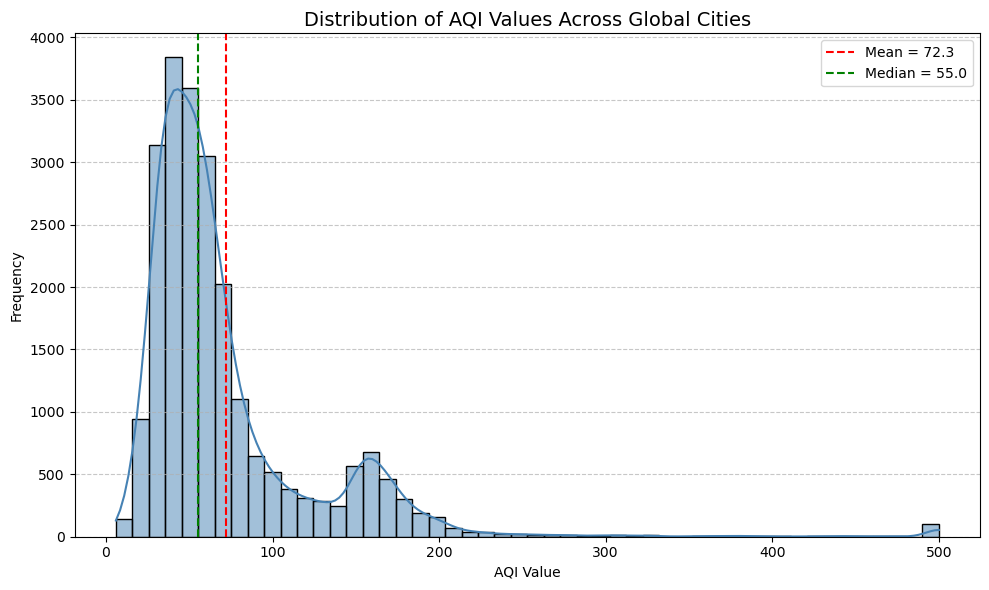

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['AQI Value'], bins=50, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribution of AQI Values Across Global Cities', fontsize=14)
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(df_clean['AQI Value'].mean(), color='red', linestyle='--', label=f"Mean = {df_clean['AQI Value'].mean():.1f}")
plt.axvline(df_clean['AQI Value'].median(), color='green', linestyle='--', label=f"Median = {df_clean['AQI Value'].median():.1f}")
plt.legend()
plt.tight_layout()
plt.show()

“This chart shows how AQI values are spread and uses two lines to mark the average and the middle value.These two lines help us see where most cities fall in the AQI data and whether any cities have very high AQI levels.”

*** Visualization ***

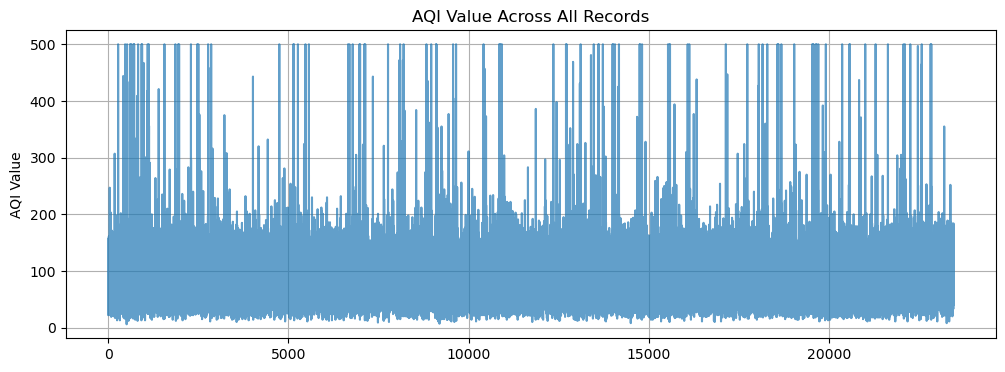

In [17]:
plt.figure(figsize=(12,4))
plt.plot(df['AQI Value'].reset_index(drop=True), alpha=0.7)
plt.title('AQI Value Across All Records')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()

“This above line chart shows how AQI values change across the dataset, helping us easily see increases, decreases, and fluctuations.”

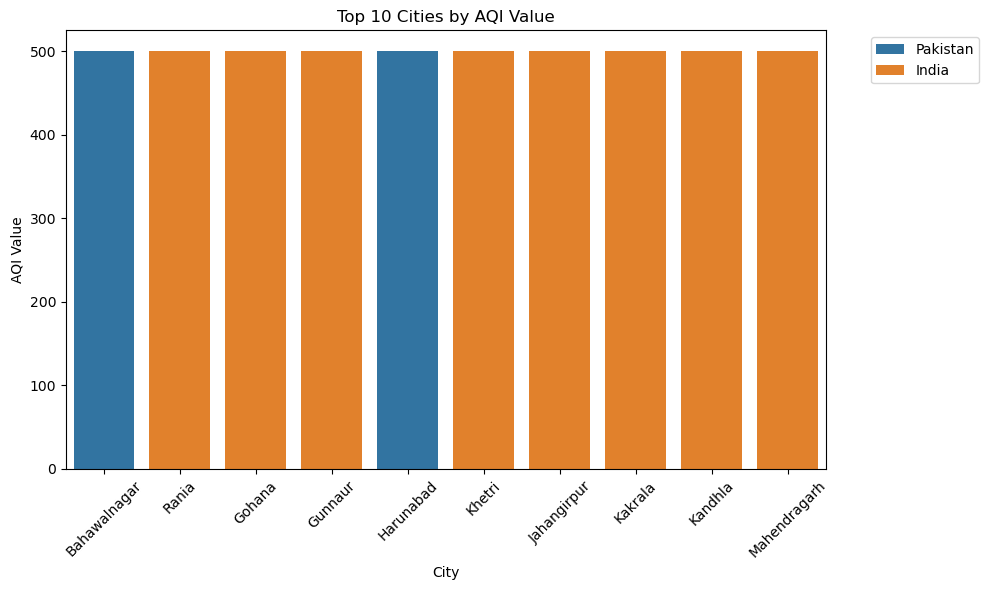

In [18]:
top10 = df.nlargest(10, 'AQI Value')
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='City', y='AQI Value', hue='Country', dodge=False)
plt.xticks(rotation=45)
plt.title('Top 10 Cities by AQI Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

“This above bar chart shows the top 10 most polluted cities and compares their AQI values along with their countries.”

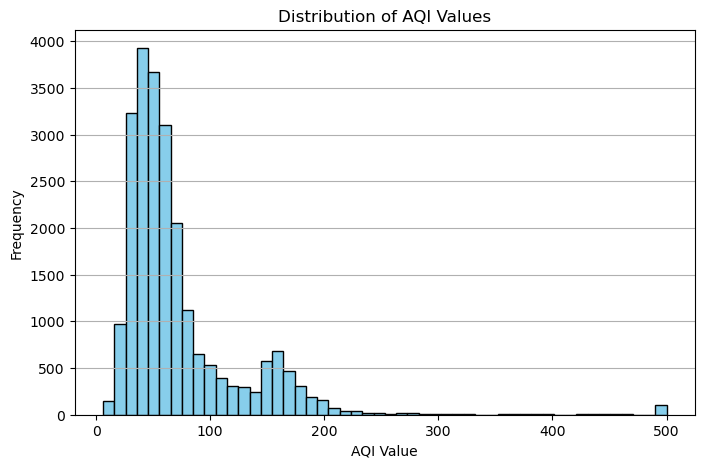

In [19]:
# Histogram: Distribution of overall AQI values
plt.figure(figsize=(8,5))
plt.hist(df['AQI Value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

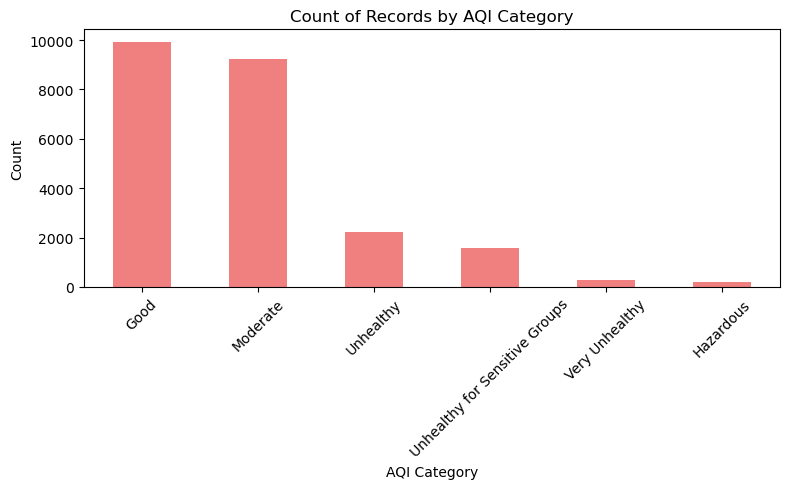

In [20]:
plt.figure(figsize=(8,5))
df['AQI Category'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Count of Records by AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

“This  above bar chart shows how many records belong to each AQI category, helping us understand which pollution levels occur most often.”

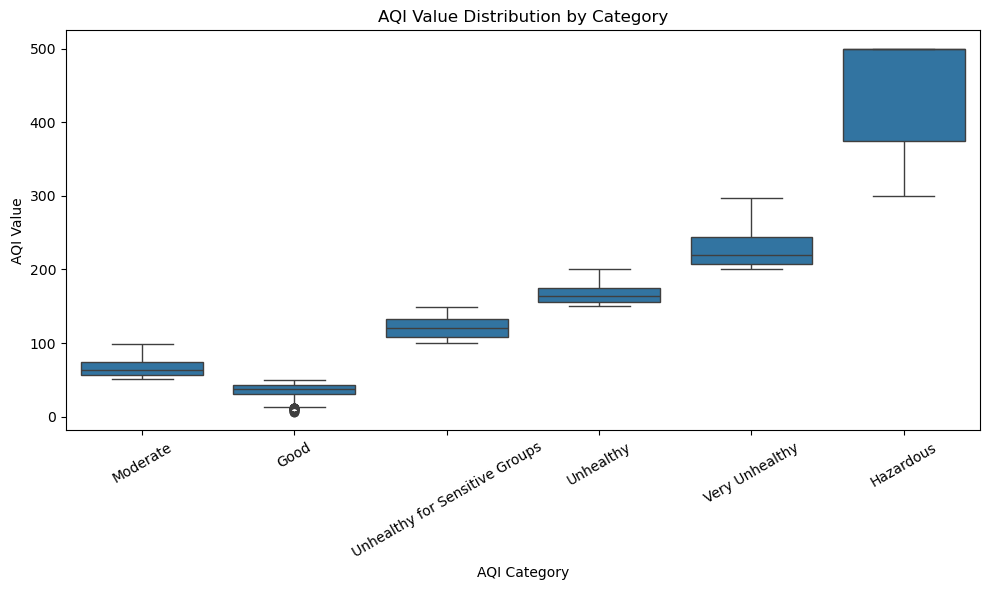

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='AQI Category', y='AQI Value')
plt.title('AQI Value Distribution by Category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

“This  above box plot shows how AQI values vary inside each category and helps compare pollution levels across different AQI groups.”

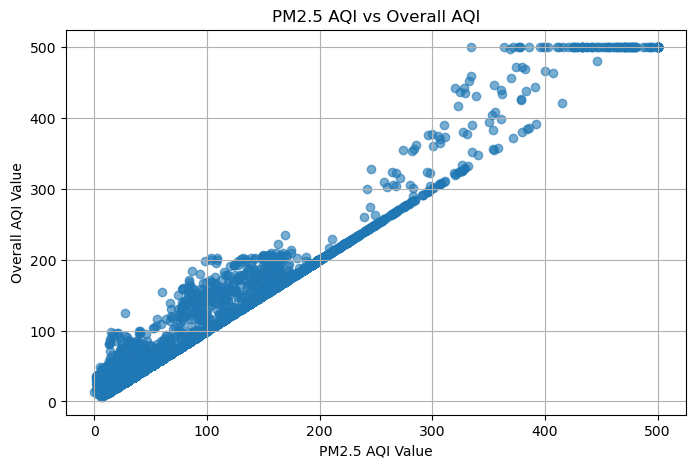

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df['PM2.5 AQI Value'], df['AQI Value'], alpha=0.6)
plt.title('PM2.5 AQI vs Overall AQI')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Overall AQI Value')
plt.grid(True)
plt.show()

“This  above scatter plot shows how PM2.5 levels influence the overall AQI and helps identify whether they are strongly related.”

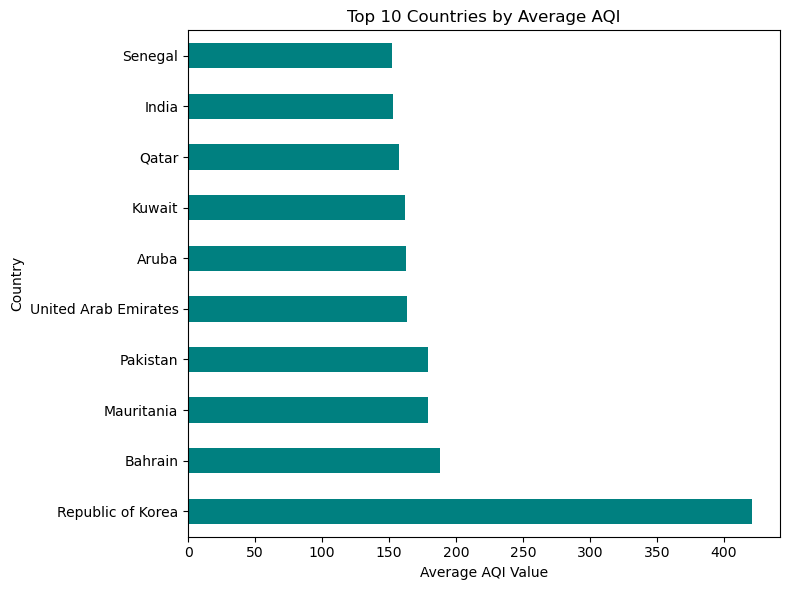

In [23]:
# Horizontal Bar: Top 10 Countries by Average AQI
top_countries = df.groupby('Country')['AQI Value'].mean().nlargest(10)
top_countries.plot(kind='barh', color='teal', figsize=(8,6))
plt.title('Top 10 Countries by Average AQI')
plt.xlabel('Average AQI Value')
plt.tight_layout()
plt.show()